In [80]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df.shape

(918, 12)

In [32]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [33]:
z_scores = df[numeric_columns].apply(zscore)

In [34]:
outliers = (z_scores > 3) | (z_scores < -3)

In [35]:
# Create a boolean mask where all rows with any outlier are marked
mask = outliers.any(axis=1)

# Remove outliers from the dataset
df_cleaned = df[~mask]

In [36]:
df_cleaned.shape

(899, 12)

In [38]:
label_encoder = LabelEncoder()

# Encode binary categorical columns using Label Encoding
df_cleaned['Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])
df_cleaned['ExerciseAngina'] = label_encoder.fit_transform(df_cleaned['ExerciseAngina'])
df_cleaned['FastingBS'] = label_encoder.fit_transform(df_cleaned['FastingBS'])

C:\Users\ALTECHUZ\AppData\Local\Temp\ipykernel_13404\3196253594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])
C:\Users\ALTECHUZ\AppData\Local\Temp\ipykernel_13404\3196253594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ExerciseAngina'] = label_encoder.fit_transform(df_cleaned['ExerciseAngina'])
C:\Users\ALTECHUZ\AppData\Local\Temp\ipykernel_13404\3196253594.py:6: SettingWithCopyWarning: 
A value is trying to be set o

In [39]:
one_hot_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, one_hot_columns)
    ],
    remainder='passthrough'
)

In [44]:
df_transformed = preprocessor.fit_transform(df_cleaned)

D:\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
one_hot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_columns)

In [46]:
# Combine new feature names with the rest of the column names (excluding the original one-hot encoded columns)
remaining_columns = [col for col in df_cleaned.columns if col not in one_hot_columns]
new_feature_names = list(one_hot_feature_names) + remaining_columns

In [51]:
df_transformed = pd.DataFrame(df_transformed, columns=new_feature_names)

In [52]:
df_transformed.head()

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0,1.0,140.0,289.0,0.0,172.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,49.0,0.0,160.0,180.0,0.0,156.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,37.0,1.0,130.0,283.0,0.0,98.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,0.0,138.0,214.0,0.0,108.0,1.0,1.5,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,54.0,1.0,150.0,195.0,0.0,122.0,0.0,0.0,0.0


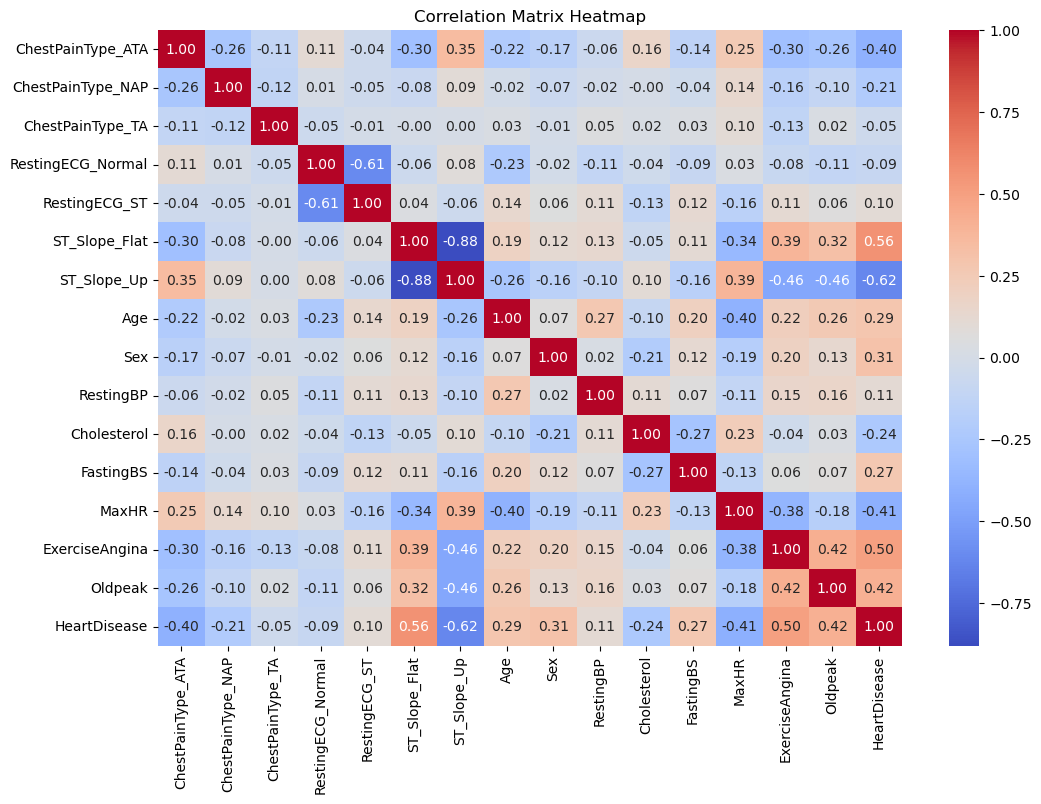

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_transformed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [53]:
X = df_transformed.drop(['HeartDisease'], axis='columns')
y = df_transformed.HeartDisease

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.06332497, -0.5349047 , -0.22955001, ...,  1.38431998,
        -0.8229452 , -0.85546862],
       [-0.48465463,  1.86949191, -0.22955001, ...,  0.7529728 ,
        -0.8229452 ,  0.13751561],
       [ 2.06332497, -0.5349047 , -0.22955001, ..., -1.53566071,
        -0.8229452 , -0.85546862],
       ...,
       [-0.48465463, -0.5349047 , -0.22955001, ..., -0.86485434,
         1.21514774,  0.33611246],
       [ 2.06332497, -0.5349047 , -0.22955001, ...,  1.46323838,
        -0.8229452 , -0.85546862],
       [-0.48465463,  1.86949191, -0.22955001, ...,  1.42377918,
        -0.8229452 , -0.85546862]])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
len(X_train)

719

In [60]:
len(X_test)

180

In [61]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier()
}

In [64]:
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

In [65]:
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name} Accuracy: {accuracy:.4f}')

SVM Accuracy: 0.8889
Logistic Regression Accuracy: 0.8889
Random Forest Accuracy: 0.9000


In [66]:
X

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0,1.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,49.0,0.0,160.0,180.0,0.0,156.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,37.0,1.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,0.0,138.0,214.0,0.0,108.0,1.0,1.5
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,54.0,1.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.0,0.0,1.0,1.0,0.0,1.0,0.0,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2
895,0.0,0.0,0.0,1.0,0.0,1.0,0.0,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4
896,0.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2
897,1.0,0.0,0.0,0.0,0.0,1.0,0.0,57.0,0.0,130.0,236.0,0.0,174.0,0.0,0.0


In [74]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(899, 3)

In [75]:
pca.explained_variance_ratio_

array([0.92112603, 0.0506488 , 0.0225813 ])

In [76]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [70]:
rf = RandomForestClassifier()

In [77]:
rf.fit(X_train_pca,y_train)

RandomForestClassifier()

In [78]:
rf.score(X_test_pca,y_test)

0.6611111111111111

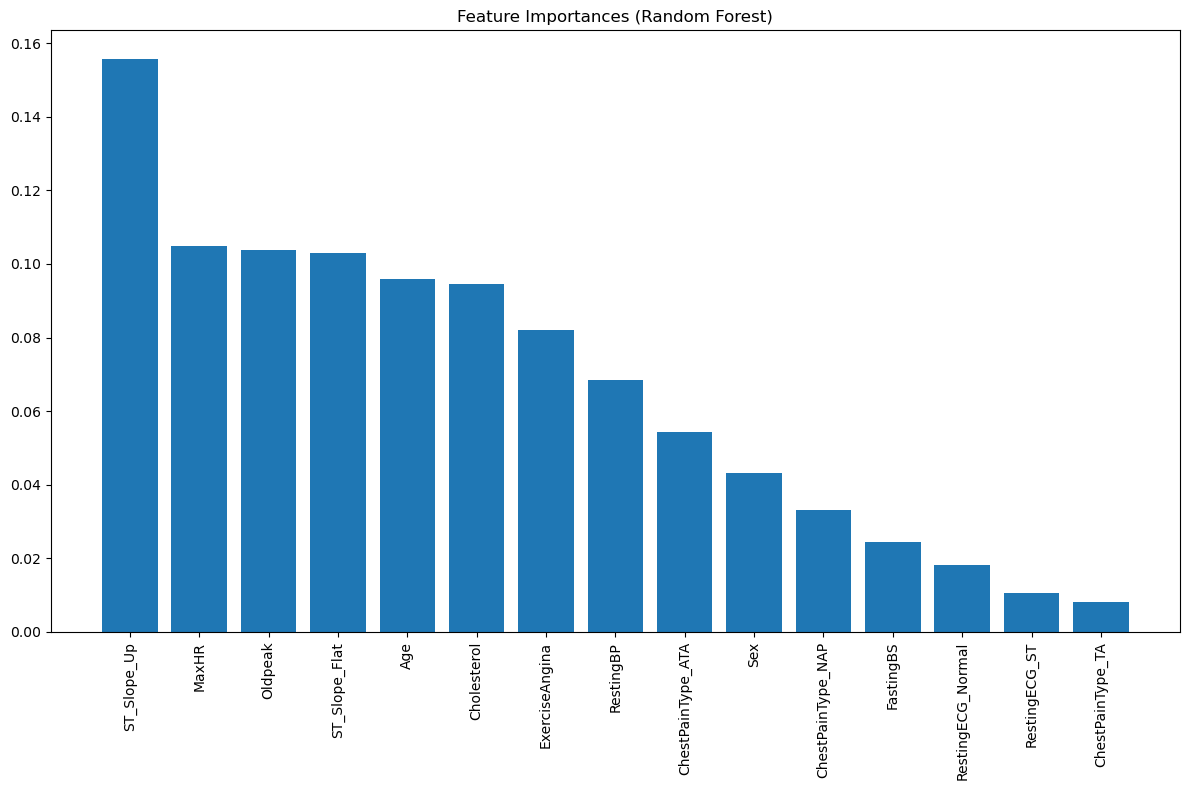

In [86]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# When model is build without PCA the computation is heavy but the highest accuracy was
Random Forest Accuracy: 0.9000
# When with PCA it reduces the accuracy but computation is much lighter and that's the trade off
0.6611111111111111 the accuracy